In [14]:
from fredapi import Fred
import pandas as pd

In [82]:
#Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis (DGS2)	
#Assets: FED Total Assets: Total Assets: Wednesday Level (RESPPANWW)
#M2 (WM2NS)
#10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (T10Y3M)
#10-Year Breakeven Inflation Rate (T10YIE)
#Nominal Broad U.S. Dollar Index (DTWEXBGS)
#Effective Federal Funds Rate (DFF)
#S&P 500 (SP500)
dict_series = {'DGS2':'2yr_yield', 'RESPPANWW':'fed_assets', 'WM2NS':'m2', 'T10Y3M':'10yr_3mo_spread', 'T10YIE':'10yr_inflation', 'DTWEXBGS':'usd_index', 'DFF':'fed_funds', 'SP500':'sp500'}


In [81]:
fred = Fred(api_key='6ca0af8ae6cb787e1f4301c544385693')
dict_data = {}
for key, value in dict_series.items():
    try:
        data = fred.get_series(key)
        dict_data[value] = data
    except:
        print(f'Failed to get {key}')
df = pd.DataFrame(dict_data)
#df = df.dropna()
df = df.reset_index()
df = df.rename(columns={'index':'date'})
df

Failed to get TWRBEXB


,date,2yr_yield,fed_assets,m2,10yr_3mo_spread,10yr_inflation,usd_index,fed_funds,sp500
0,1954-07-01,NaN,NaN,NaN,NaN,NaN,NaN,1.13,NaN
1,1954-07-02,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN
2,1954-07-03,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN
3,1954-07-04,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN
4,1954-07-05,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN
...,...,...,...,...,...,...,...,...,...
25317,2023-10-24,5.02,NaN,NaN,-0.75,2.40,124.0275,5.33,4247.68
25318,2023-10-25,5.08,7907830.0,NaN,-0.64,2.43,124.1700,5.33,4186.77
25319,2023-10-26,5.02,NaN,NaN,-0.73,2.42,124.3841,5.33,4137.23
25320,2023-10-27,4.99,NaN,NaN,-0.75,2.42,124.0232,5.33,4117.37


In [83]:
df = df[df['date'] >= '2011-04-01']
#fill in missing values with previous value
df = df.fillna(method='ffill')

,date,2yr_yield,fed_assets,m2,10yr_3mo_spread,10yr_inflation,usd_index,fed_funds,sp500
20728,2011-04-01,0.80,NaN,NaN,3.39,2.52,87.7993,0.11,NaN
20729,2011-04-02,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN
20730,2011-04-03,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN
20731,2011-04-04,0.77,NaN,9070.3,3.39,2.54,87.8406,0.09,NaN
20732,2011-04-05,0.84,NaN,NaN,3.43,2.56,87.7483,0.09,NaN
...,...,...,...,...,...,...,...,...,...
25317,2023-10-24,5.02,NaN,NaN,-0.75,2.40,124.0275,5.33,4247.68
25318,2023-10-25,5.08,7907830.0,NaN,-0.64,2.43,124.1700,5.33,4186.77
25319,2023-10-26,5.02,NaN,NaN,-0.73,2.42,124.3841,5.33,4137.23
25320,2023-10-27,4.99,NaN,NaN,-0.75,2.42,124.0232,5.33,4117.37


In [27]:
data_sp

2013-10-31    1756.54
2013-11-01    1761.64
2013-11-04    1767.93
2013-11-05    1762.97
2013-11-06    1770.49
               ...   
2023-10-24    4247.68
2023-10-25    4186.77
2023-10-26    4137.23
2023-10-27    4117.37
2023-10-30    4166.82
Length: 2608, dtype: float64

In [42]:
df_data_sp = pd.DataFrame(data_sp.values, columns=["Values"], index=data_sp.index)
df_data_sp["Date"] = data_sp.index
df_data_sp.index = df_data_sp["Date"] 
#df_data_sp.drop("Date", axis=1, inplace=True)
df_data_sp

,Values,Date
Date,,
2013-10-31,1756.54,2013-10-31
2013-11-01,1761.64,2013-11-01
2013-11-04,1767.93,2013-11-04
2013-11-05,1762.97,2013-11-05
2013-11-06,1770.49,2013-11-06
...,...,...
2023-10-24,4247.68,2023-10-24
2023-10-25,4186.77,2023-10-25
2023-10-26,4137.23,2023-10-26


In [54]:
data_sp_week = df_data_sp
data_sp_week["week"] = df_data_sp["Date"].transform(lambda x: f'{x.week} + {x.year}')
data_sp_week

,Values,Date,week
Date,,,
2013-10-31,1756.54,2013-10-31,44 + 2013
2013-11-01,1761.64,2013-11-01,44 + 2013
2013-11-04,1767.93,2013-11-04,45 + 2013
2013-11-05,1762.97,2013-11-05,45 + 2013
2013-11-06,1770.49,2013-11-06,45 + 2013
...,...,...,...
2023-10-24,4247.68,2023-10-24,43 + 2023
2023-10-25,4186.77,2023-10-25,43 + 2023
2023-10-26,4137.23,2023-10-26,43 + 2023


<Axes: xlabel='Date'>

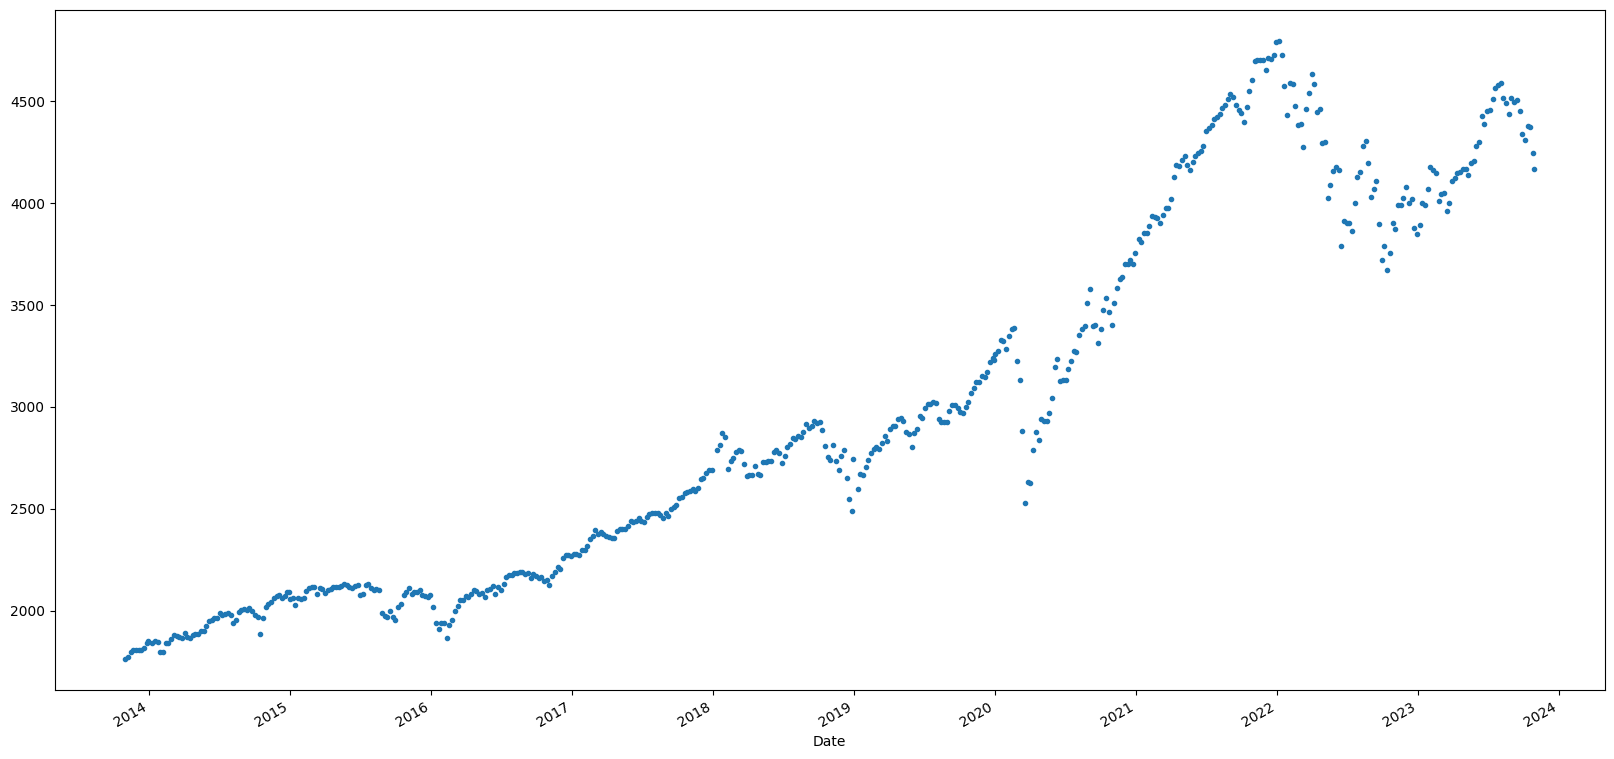

In [76]:
x = data_sp_week.groupby("week")[["Date", "Values"]].max()
df_x = pd.DataFrame(x)
df_x.index = df_x["Date"]
df_x.sort_index(inplace=True)
df_x["Values"].plot(style=".", figsize=(20,10))
